# Lab 2

## Read the dataset

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("resources/nyc_january_1895-2018.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     124 non-null    int64  
 1   Value    124 non-null    float64
 2   Anomaly  124 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.0 KB


In [4]:
df

,Date,Value,Anomaly
0,189501,28.7,-2.9
1,189601,27.9,-3.7
2,189701,28.8,-2.8
3,189801,33.3,1.7
4,189901,29.3,-2.3
...,...,...,...
119,201401,28.7,-2.9
120,201501,30.0,-1.6
121,201601,34.5,2.9
122,201701,38.1,6.5


## Data Preparation

#### Rename columns

In [5]:
df = df.rename(columns={'Value': 'Temperature'})

#### Remove the last two digits of the 'Date' column

In [6]:
df['Date'] =  df['Date']//100

In [7]:
df.head()

,Date,Temperature,Anomaly
0,1895,28.7,-2.9
1,1896,27.9,-3.7
2,1897,28.8,-2.8
3,1898,33.3,1.7
4,1899,29.3,-2.3


In [8]:
df.describe()

,Date,Temperature,Anomaly
count,124.000000,124.000000,124.000000
mean,1956.500000,31.553226,-0.046774
std,35.939764,4.462772,4.462772
min,1895.000000,20.800000,-10.800000
25%,1925.750000,28.700000,-2.900000
50%,1956.500000,31.400000,-0.200000
75%,1987.250000,34.425000,2.825000
max,2018.000000,42.300000,10.700000


##  Vizualization

<Axes: xlabel='Date', ylabel='Temperature'>

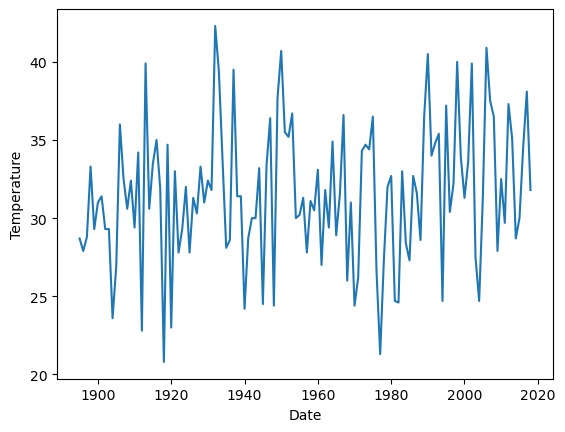

In [9]:
sns.lineplot(x = "Date", y ="Temperature", data=df)

## Build Models

In [10]:
from scipy import stats
import matplotlib.pyplot as plt

import numpy as np

In [11]:
x, y = df['Date'], df['Temperature']

In [12]:
model = stats.linregress(x, y)

#### Predictions

In [13]:
years = [2019, 2020, 2021, 2022]
predict = lambda year: model.slope * year + model.intercept
predictions = list(map(predict, years))
predictions

[32.87183320220299, 32.89293092053501, 32.91402863886704, 32.93512635719905]

In [14]:
years = [1894, 1893, 1892, 1891, 1890]
predictions_before = list(map(predict, years))
predictions_before

[30.234618410700232,
 30.21352069236821,
 30.192422974036187,
 30.171325255704165,
 30.150227537372142]

Plot data and a linear regression model fit

(10.0, 50.0)

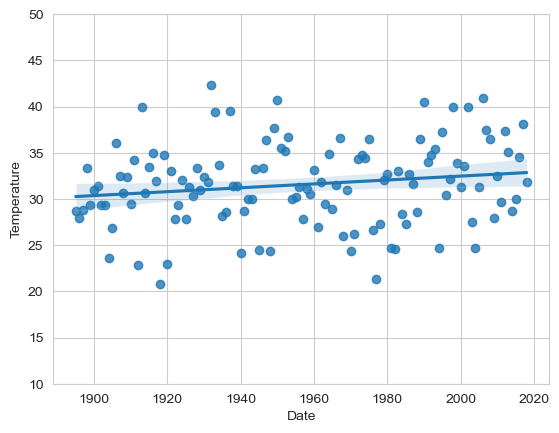

In [15]:
sns.set_style('whitegrid')
plot = sns.regplot(x = "Date", y ="Temperature", data=df)
plot.set_ylim(10, 50)

# Compare with fact data

In [16]:
fact_df = pd.read_csv('resources/nyc_january_2019-2022.csv').drop('Anomaly', axis=1)

In [17]:
fact_df['Prediction'] = predictions
fact_df['Accuracy'] = (1 - abs((fact_df['Prediction'] - fact_df['Value']) / fact_df['Value'])) * 100

In [18]:
fact_df

,Date,Value,Prediction,Accuracy
0,2019,32.6,32.871833,99.166156
1,2020,39.2,32.892931,83.910538
2,2021,34.8,32.914029,94.580542
3,2022,30.4,32.935126,91.660769


In [19]:
df.corr()

,Date,Temperature,Anomaly
Date,1.000000,0.169905,0.169905
Temperature,0.169905,1.000000,1.000000
Anomaly,0.169905,1.000000,1.000000
